# Classification on MNIST

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix , precision_recall_curve , precision_score , recall_score , f1_score , roc_curve , roc_auc_score

In [124]:
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame= False)

`There are 70,000 images, and each image has 784 features. This is because
each image is 28 × 28 pixels, and each feature simply represents one pixel’s
intensity, from 0 (white) to 255 (black)`

In [4]:
X,y = mnist.data , mnist.target

In [7]:
X.shape , y.shape

((70000, 784), (70000,))

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

# Visualization
`All we need to do is grab an instance’s feature
vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s
imshow() function. We use cmap="binary" to get a grayscale color map
where 0 is white and 255 is black:`

In [46]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.gca().axis('off')  # Using plt.gca() cause without it there was a bool func is not callable error 
    plt.show()

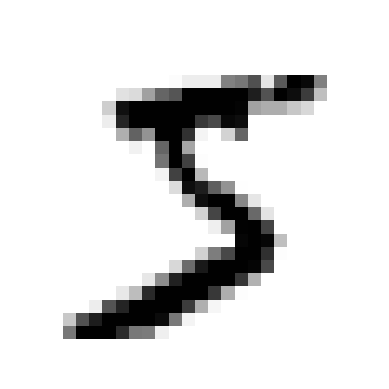

In [47]:
plot_digit(X[0])

# Making and putting aside the test set 
`The MNIST dataset returned by fetch_openml() is
actually already split into a training set (the first 60,000 images) and a test set
(the last 10,000 images):`

In [49]:
X_train , X_test , y_train , y_test = X[:60000] , X[60000:] , y[:60000] , y[60000:]
#The training set is already shuffled for us, which is good because this guarantees that all cross-validation folds will be similar


# Training a Binary Classifier


In [50]:
y_tr_4 = (y_train=='4')
y_ts_4 = (y_test=='4')

In [105]:
y_tr_5 = (y_train =='5')
y_ts_5 = (y_test =='5')

In [52]:
# using SGD
sgd_cl = SGDClassifier(random_state=42)
sgd_cl.fit(X_train,y_tr_4)

SGDClassifier(random_state=42)

In [106]:
sgd_cl_5 = SGDClassifier(random_state=42)
sgd_cl_5.fit(X_train,y_tr_5)

SGDClassifier(random_state=42)

<img src="download.png">

In [93]:
a=[]
for i in range (0,10):
    some_digit = X[i]
    a.append(sgd_cl.predict([some_digit])[0])
    i+=1
a
# can match with above image 

[False, False, True, False, False, False, False, False, False, True]

# Performance Measure 

In [95]:
# Cross-Validation
cross_val_score(sgd_cl,X_train,y_tr_4,cv=3,scoring="accuracy")

array([0.9671 , 0.97645, 0.9687 ])

In [97]:
# now with a dummy classifier
dummy_cl = DummyClassifier(random_state=42)
dummy_cl.fit(X_train,y_tr_4)
print(any(dummy_cl.predict(X_train)))

False


In [98]:
cross_val_score(dummy_cl,X_train,y_tr_4,cv=3,scoring="accuracy")

array([0.90265, 0.90265, 0.9026 ])

# Implement Cross_val manually
<img src="Cross_val.png">

# Confusion matrix

In [107]:
y_train_pred = cross_val_predict(sgd_cl_5,X_train,y_tr_5,cv=3)

In [108]:
# building Confusion Matrix 
cm = confusion_matrix(y_tr_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [109]:
# pretending to be a true classifier 
y_train_pred_pref = y_tr_5
cm = confusion_matrix(y_tr_5,y_train_pred_pref)
cm

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [112]:
precision_score(y_tr_5,y_train_pred) , recall_score(y_tr_5,y_train_pred) , f1_score(y_tr_5,y_train_pred)

(0.8370879772350012, 0.6511713705958311, 0.7325171197343847)

# Precision Recall tradeoff and THRESHOLD 

In [113]:
y_scores = cross_val_predict(sgd_cl_5,X_train,y_tr_5,cv=3,method="decision_function")

In [116]:
precisons , recalls, thresholds = precision_recall_curve(y_tr_5,y_scores)

In [122]:
threshold=3000

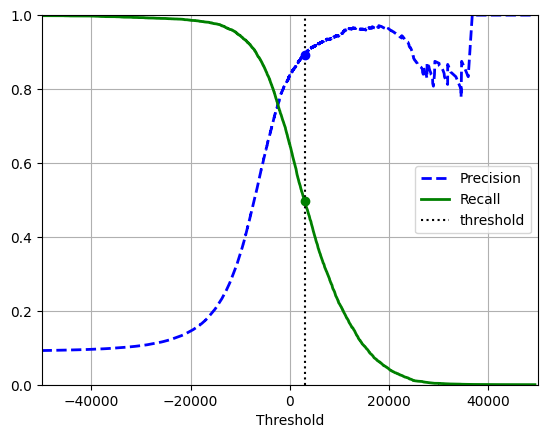

In [127]:
# ploting 
%matplotlib inline
plt.plot(thresholds,precisons[:-1],"b--",label="Precision",linewidth=2)
plt.plot(thresholds,recalls[:-1],"g-",label="Recall",linewidth=2)
plt.vlines(threshold,0,1.0,"k","dotted",label="threshold")

# extra code – this section just beautifies and saves Figure 3–5.... Copied from book
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisons[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.gca().axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

`You may wonder why the precision curve is bumpier than the recall curve....The reason is that precision may sometimes go down when you raise the threshold
(although in general it will go up)....On the other hand, recall can
only go down when the threshold is increased, which explains why its curve looks smooth.
`

Text(0.56, 0.62, 'Higher\nthreshold')

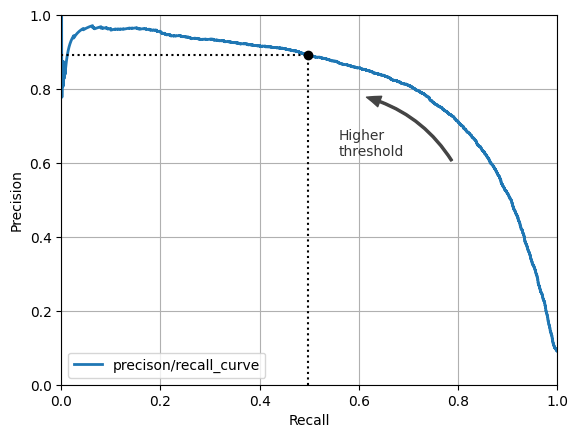

In [139]:
#Another way to select a good precision/recall trade-off is to plot precision directly against recall
import matplotlib.patches as patches
plt.plot(recalls,precisons,linewidth=2,label="precison/recall_curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.gca().axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.plot([recalls[idx], recalls[idx]], [0., precisons[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisons[idx], precisons[idx]], "k:")
plt.plot([recalls[idx]], [precisons[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")

In [142]:
# we try to get a threshold value that provides 90% precision

idx_for_90 = (precisons>=0.90).argmax()
threshold_for_90 = thresholds[idx_for_90]
threshold_for_90

3370.0194991439557

In [152]:
# to make prediction on training set you can call (for 90 precision)
y_train_pred_90 = (y_scores>=threshold_for_90)

# get scores too if u want 

precision_score(y_tr_5,y_train_pred_90) , recall_score(y_tr_5,y_train_pred_90)

(0.9000345901072293, 0.4799852425751706)

# ROC Curve

In [154]:
fpr , tpr, thresholds = roc_curve(y_tr_5,y_scores)

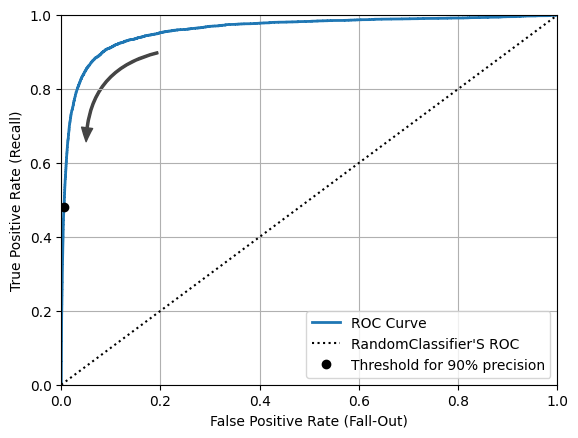

In [172]:
#plot FPR vs TPR 
idx_for_threshold_at_90 = (thresholds<=threshold_for_90).argmax()
tpr_90 , fpr_90 = tpr[idx_for_threshold_at_90] , fpr[idx_for_threshold_at_90]

plt.plot(fpr,tpr,linewidth=2,label="ROC Curve")
plt.plot([0,1],[0,1],"k:",label="RandomClassifier'S ROC")
plt.plot([fpr_90],[tpr_90],"ko",label="Threshold for 90% precision")
plt.gca().axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.9), (0.05, 0.65),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

In [173]:
roc_auc_score(y_tr_5,y_scores)

0.9604938554008616